In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import pandas as pd

/home/mc741/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


## Read tables

In [2]:
cat1=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat40039570.fits')
cat2=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat40039610.fits')
cat3=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat40049400.fits')
cat4=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60080410.fits')
cat5=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60092780.fits')
cat6=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_0.fits')
cat7=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_1.fits')
cat8=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_2.fits')
cat9=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_3.fits')
cat10=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_4.fits')
cat11=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_5.fits')
cat12=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_6.fits')
cat13=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_8.fits')
cat14=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_9.fits')
cat15=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_10.fits')
cat16=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_11.fits')
cat17=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_12.fits')
cat18=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_13.fits')
cat19=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat60096211_7.fits')
cat20=Table.read('data/output/dmu26_XID+MIPS_AKARI-NEP_cat40019880.fits')

In [3]:
catalogs=[cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18, cat19,cat20]
for c in catalogs:
    for i,source in enumerate(c['help_id']):
        if source in cat1['help_id']:
            if c[i]['FErr_MIPS_24_u'] < cat1[i]['FErr_MIPS_24_u']:
            #if c[i]['Rhat_MIPS_24'] < cat1[i]['Rhat_MIPS_24']:
                cat1[i] = c[i]
            else:
                continue
        else:
            cat1.add_row(c[i])
        


In [4]:
NEP_cat=cat1

## Look at Symmetry of PDFs to determine depth level of catalogue

2.7453837


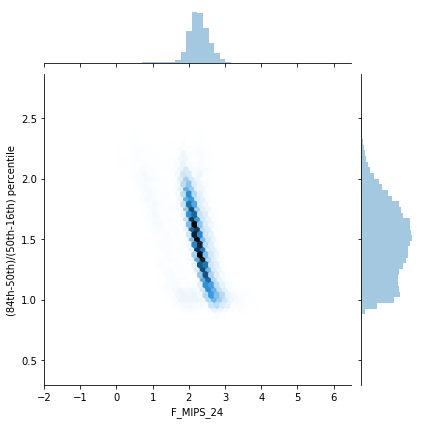

In [5]:
import seaborn as sns
skew=(NEP_cat['FErr_MIPS_24_u']-NEP_cat['F_MIPS_24'])/(NEP_cat['F_MIPS_24']-NEP_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(NEP_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))


Both seem to have flux pdfs that become Gaussian at ~30$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [6]:
from astropy.table import Column
NEP_cat.add_column(Column(np.zeros(len(NEP_cat), dtype=bool),name='flag_mips_24'))


In [7]:
ind_NEP=(NEP_cat['Pval_res_24']>0.5) | (NEP_cat['F_MIPS_24'] < 30.0)

In [8]:
NEP_cat['flag_mips_24'][ind_NEP]=True


In [9]:
NEP_cat.write('./data/output/dmu26_XID+MIPS_AKARI-NEP_cat_20190227.fits', format='fits',overwrite=True)

### Check Map


In [10]:
from astropy.io import fits
import pylab as plt

In [11]:
MIPS_pval=fits.open('./data/output/Pval/dmu26_XID+MIPS_AKARI-NEP_Bayes_Pval1.fits')


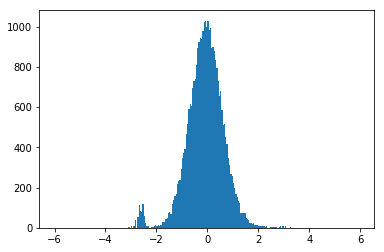

In [12]:
plt.hist(MIPS_pval[1].data[np.isfinite(MIPS_pval[1].data)],bins=np.arange(-6,6,0.05));